In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Finite Search Problem

**Part 3)**

In [519]:
p_vals = np.array([0.25, 0.5, 0.25])
w = np.array([7, 10, 11])

def solve_model(w, p_vals, β=0.96, c=8, T=65):
    
    V = np.zeros((T, len(w)))        # Value function matrix
    V[-1] = np.maximum(w, c)         # Last period decision when unemployed
    σ = np.empty_like(V, dtype=int)  # Policy matrix
    σ[-1] = w > c                    # Last period policy
    
    for t in range(T-1, 0, -1):
        accept = (1 - β**(T - t + 1)) / (1 - β) * w
        reject = c + β * V[t, :] @ p_vals
        V[t-1, :] = np.maximum(reject, accept)
        σ[t-1, :] = accept > reject
        
    return V, σ

**Part 5)**

In [548]:
T = 65
S = 10000

def simulate_life(w, p_vals, β=0.96, c=8, S=100, T=65):
    
    V, σ = solve_model(w, p_vals, β, c, T)
    
    working = np.zeros((S, T))  # Matrix indicating whether working
    wage = np.zeros(S)          # Wage accepted by each worker
    age = np.zeros(S)           # Age when worker accepts wage

    for s in range(S):
        unemployed = True
        t = 0
        while unemployed:
            offer = np.random.choice(3, p=p_vals)  # Draw wage index
            if σ[t, offer] == 1:       # Check policy function for wage offer
                working[s, t:] = 1     # Accept offer for rest of life
                wage[s] = w[offer]
                age[s] = t + 1
                unemployed = False
            else:
                t += 1                 # Draw another offer
                
    return working, wage, age

**Part 6)**

In [549]:
working, wage, age = simulate_life(w, p_vals)

In [550]:
age.mean()

3.53

In [551]:
wage.mean()

11.0

**Part 7)**

In [555]:
working, wage, age = simulate_life(w, p_vals, c=4.5)
age.mean()

2.97

In [553]:
wage.mean()

10.71

## Problem 2: Convergence in sup-norm

**Part 1)**


$$
\sup_{x \in [-1,1]} \big\{ (x^2 + \frac{1}{n})^{\frac{1}{2}} - |x| \big\} \\
\leq \sup_{x \in [-1,1]} \big\{ |x| + \frac{1}{\sqrt{n}} - |x| \big\} \\
= \sup_{x \in [-1,1]} \big\{ \frac{1}{\sqrt{n}} \big\} \to 0 \\
$$

So $f_n$ converges (uniformly) to $|x|$


**Part 2)**

In [3]:
f = lambda x, n: (x**2 + 1 / n)**(1/2)

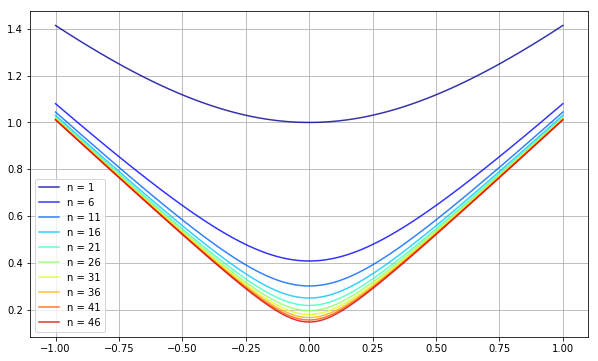

In [187]:
x_grid = np.linspace(-1, 1, 100)
max_n = 50
n_grid = np.arange(1, max_n, 5)

plt.figure(figsize=(10, 6))
for n in n_grid:
    plt.plot(x_grid, f(x_grid, n), alpha=0.8,
             label=f'n = {n:d}', color=plt.cm.jet(n / max_n))

plt.legend()
plt.grid()
plt.show()

## Problem 3: Central limit theorem

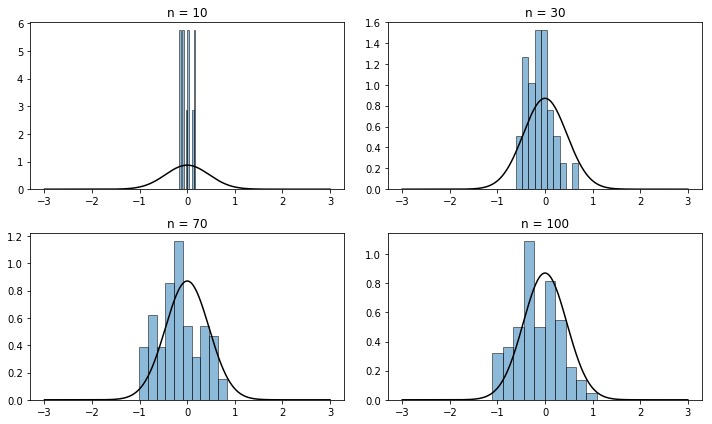

In [291]:
from scipy.stats import bernoulli, norm

T = 100
x_grid = np.linspace(-3, 3, 10000)
n_grid = [10, 30, 70, 100]
p = 0.7

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for n, ax in zip(n_grid, axes.flatten()):
    x_bar = bernoulli.rvs(p, size=(T, n)).mean(axis=0)
    hist, bins = np.histogram((x_bar - bernoulli.mean(p)) * np.sqrt(n), 
                              density=True)
    ax.bar(bins[:-1], hist, 
           width=bins[1] - bins[0], 
           edgecolor='k', 
           alpha=0.5)
    ax.plot(x_grid, norm.pdf(x_grid, scale=bernoulli.std(p)), 'k')
    ax.set_title(f'n = {n}')

plt.tight_layout()
plt.show()

## Problem 4: Fixed point problem